### E-Commerece Customer Segmentation Using RFM Approach

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [112]:
df = pd.read_csv('E-com_Data.csv')

In [113]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [115]:
df.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [116]:
df.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [117]:
#These are the insignificant columns as Price is multiplication of price per unit and Quantity
# Itemcode is irrelevant as we are only interested in customer behaviour
# Time is not required here like in Stock Market Predictions as Recency can be seen by date and Invoice No.
df.drop(['Sold as set','Cancelled_status',
         'Shipping Location','price per Unit','Time',
         'Quantity','Item Code','Reason of return'],inplace =True,axis = 1)
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [118]:
df.duplicated().sum()

6008

In [119]:
df = df.drop_duplicates(ignore_index = True)
print(f'Number of duplicates after preprocessing is {df.duplicated().sum()}')

Number of duplicates after preprocessing is 0


In [120]:
df = df.rename(columns = {'InvoieNo': 'InvoiceNo','Date of purchase':'Date'})
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [121]:
df.isnull().sum()

CustomerID    132249
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [122]:
# As in the RFM Approach We are focusing on Recency,Frequency,And Monetary Value for Customers
# As the data with absence of CustomerID in Data doesnot serve the purpose of Segmentation 
print(f"As {round(((df['CustomerID'].isnull().sum() / len(df)) * 100),2)} percent of CustomerID data is missing, we will drop the rows.")
df = df.dropna(subset= ['CustomerID'])
print('After dropping the na values:')
print(df.isnull().sum())

As 24.71 percent of CustomerID data is missing, we will drop the rows.
After dropping the na values:
CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64


In [123]:
#DateTime Analysis
# As the Date is Given in a Object Datatype we have to convert to DateTime
df.info()
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   InvoiceNo   402859 non-null  float64
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [124]:
#As for the Recency or to know how much old customer is we can take date a day after the last date in data as reference.

# How recently the customer has bought can be calculated w.r.t to the lastest date

# And Many Invoice Generate for a single Customer ID will give us the Frequency

# Sum of the Price for the total Amount a customer has spent.
latest_data = pd.datetime(2017,12,20)
RFMScore = df.groupby('CustomerID').agg({'Date' :lambda x :(latest_data - x.max()).days,
                                       'InvoiceNo': lambda x : x.count(),
                                       'Price': lambda x : x.sum()})
RFMScore.rename(columns = {'Date':'Recency','InvoiceNo':'Frequency','Price':'Monetary'},inplace = True)

In [125]:
RFMScore.reset_index(inplace = True)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0


In [126]:
for col in RFMScore:
    print('*' * 20, col, '*' * 20)
    print()
    sorted_values = RFMScore.sort_values(by=col)[col]
    print(sorted_values.tolist())
    print()
    print('*' * 40)

******************** CustomerID ********************

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 127.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 1

In [127]:
RFMScore.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4349.0,2187.093355,1261.544319,2.0,1095.0,2186.0,3279.0,4372.0
Recency,4349.0,61.445160,89.656941,1.0,10.0,19.0,73.0,617.0
Frequency,4349.0,92.632559,230.742279,1.0,17.0,42.0,101.0,7919.0
Monetary,4349.0,229493.932881,855668.518674,-50372.0,38140.0,83635.0,205444.0,35472089.0


# Segmentation Concept

In [128]:
RFMScore['Recency'].describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [129]:
RFMScore['Frequency'].describe()

count    4349.000000
mean       92.632559
std       230.742279
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7919.000000
Name: Frequency, dtype: float64

In [130]:
RFMScore['Monetary'].describe()

count    4.349000e+03
mean     2.294939e+05
std      8.556685e+05
min     -5.037200e+04
25%      3.814000e+04
50%      8.363500e+04
75%      2.054440e+05
max      3.547209e+07
Name: Monetary, dtype: float64

In [131]:
quantile = RFMScore.quantile(q = [0.25,0.5,0.75])
quantile = pd.DataFrame(quantile.to_dict())
quantile

,CustomerID,Recency,Frequency,Monetary
0.25,1095.0,10.0,17.0,38140.0
0.50,2186.0,19.0,42.0,83635.0
0.75,3279.0,73.0,101.0,205444.0


In [132]:
#As More Recent Customer is more Valuable Customer in Recency 

# x = Condition,d = RFMScore['Recency'],p = quantile
def recency_score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x<= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

In [133]:
RFMScore['Recency_Score'] = RFMScore['Recency'].apply(recency_score, args =('Recency',quantile))

In [134]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score
0,2.0,4,181,550416.0,1
1,3.0,77,27,257404.0,4
2,4.0,20,72,176613.0,3
3,5.0,18,16,41976.0,2
4,6.0,9,84,151822.0,1


In [135]:
def FreqNMon_score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [136]:
RFMScore['Frequency_Score'] = RFMScore['Frequency'].apply(FreqNMon_score, args =('Frequency',quantile))
RFMScore['Monetary_Score'] = RFMScore['Monetary'].apply(FreqNMon_score, args =('Monetary',quantile))

In [137]:
RFMScore

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [138]:
#RFM Columns will be all the Scores combined not added
RFMScore['RFM'] = RFMScore.Recency_Score.map(str)+RFMScore.Frequency_Score.map(str)+RFMScore.Monetary_Score.map(str)

In [139]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM
0,2.0,4,181,550416.0,1,1,1,111
1,3.0,77,27,257404.0,4,3,1,431
2,4.0,20,72,176613.0,3,2,2,322
3,5.0,18,16,41976.0,2,4,3,243
4,6.0,9,84,151822.0,1,2,2,122


In [140]:
RFMScore['RFMScore'] = RFMScore[['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis = 1)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM,RFMScore
0,2.0,4,181,550416.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5


In [141]:
RFMScore['RFMScore'].value_counts()

3     509
10    480
9     460
8     451
7     439
12    408
11    404
5     402
6     399
4     397
Name: RFMScore, dtype: int64

In [142]:
# We are going to Label Customer as per the Quantile Cutoff
Customer_Seg = ['Platinum','Gold','Silver','Bronze']
score_cut = pd.qcut(RFMScore['RFMScore'],q = 4,labels = Customer_Seg)
RFMScore['Customer_Seg'] = score_cut.values
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM,RFMScore,Customer_Seg
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum


In [ ]:
seg_map={
    r'[1][1-2][2-3]':"Inactive or Passerby customers ",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-4][3-4]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    r'[3][3][3]':"need_attention",
    r'[3-4][3-4][2-4]':"promising",
    r'[1-2][1-4][1-2]':"new customer",
    r'[3-4][[1-2][1-2]':'Nurture',
    r'[3-4][[1-2][3-4]': 'Drive_Loyality',
    }

RFMScore["Segment"]=RFMScore["RFM"].replace(seg_map,regex=True)
RFMScore['Segment'].value_counts()


In [143]:
RFMScore.to_csv('Segmentation_analysis.csv')

# Visualization

In [144]:
new_datapoint = RFMScore.groupby('Customer_Seg')[['Recency','Frequency','Monetary','CustomerID']].agg({
    'Recency':'sum','Frequency':'sum','Monetary':'sum','CustomerID':'nunique'
    }).reset_index()

In [145]:
new_datapoint = new_datapoint.rename(columns = {'CustomerID':'No of Customers'} )

In [146]:
new_datapoint['Customer Percent'] =round(new_datapoint['No of Customers']/new_datapoint['No of Customers'].sum()*100,2)
new_datapoint

,Customer_Seg,Recency,Frequency,Monetary,No of Customers,Customer Percent
0,Platinum,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,Silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [147]:
new_datapoint.drop(['Recency','Frequency','Monetary'],axis = 1,inplace = True)

In [148]:
new_datapoint

,Customer_Seg,No of Customers,Customer Percent
0,Platinum,1308,30.08
1,Gold,1289,29.64
2,Silver,940,21.61
3,Bronze,812,18.67


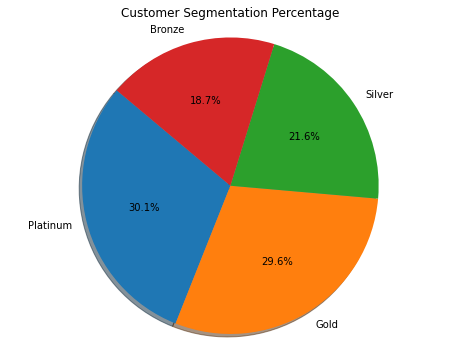

In [149]:
plt.figure(figsize=(8, 6))
plt.pie(new_datapoint['Customer Percent'], labels=new_datapoint['Customer_Seg'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Customer Segmentation Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [150]:
RFM = RFMScore[['Recency','Frequency','Monetary']]

In [151]:
RFM

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0
...,...,...,...
4344,17,10,20480.0
4345,181,7,10774.0
4346,12,13,24962.0
4347,4,751,279720.0


In [152]:
#Preprocessing Scaling
from sklearn.preprocessing import StandardScaler

In [153]:
sc = StandardScaler()
RFM_sc = sc.fit_transform(RFM)
scaled_data = pd.DataFrame(RFM_sc,index = RFM.index,columns = RFM.columns)

In [154]:
scaled_data

,Recency,Frequency,Monetary
0,-0.640796,0.383014,0.375097
1,0.173513,-0.284474,0.032622
2,-0.462317,-0.089428,-0.061808
3,-0.484627,-0.332151,-0.219173
4,-0.585021,-0.037416,-0.090784
...,...,...,...
4344,-0.495782,-0.358157,-0.244298
4345,1.333623,-0.371160,-0.255642
4346,-0.551556,-0.345154,-0.239059
4347,-0.640796,2.853587,0.058705


# Model Building

In [155]:
from sklearn.cluster import KMeans

In [168]:
wcss = []

for i in range(2,30):
    KM = KMeans(n_clusters = i,init = 'k-means++',max_iter = 1000,random_state = 101)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

In [169]:
wcss

[14241.355878937411,
 9554.993310304608,
 5595.238004572407,
 4117.54659291634,
 2903.6053152001728,
 1978.0059023734616,
 1756.5908651853151,
 1606.2779257741502,
 1412.2681317715783,
 1272.3085079702594,
 1146.0176401682425,
 1014.1546087881401,
 876.3232211326584,
 783.1889089801318,
 706.4729813129284,
 602.2301567358666,
 535.7251436504462,
 491.98984866220746,
 445.3224755399358,
 412.8811236184603,
 389.8180535376404,
 365.0014871007489,
 344.3338394867258,
 315.1518827363926,
 310.18196261986066,
 295.3049859705695,
 275.55340558155996,
 263.0527098848851]

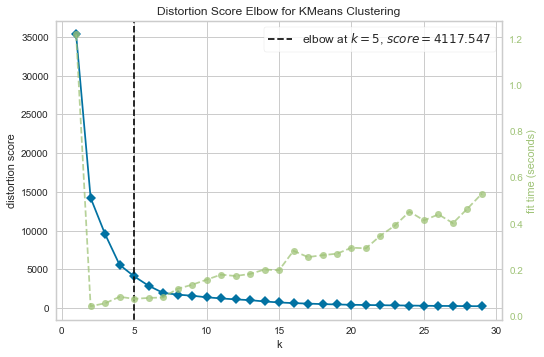

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [176]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,30)).fit(pd.DataFrame(scaled_data))
visualizer.show()

In [177]:
KM = KMeans(n_clusters = 5,init = 'k-means++',max_iter = 1000,random_state = 1)

In [178]:
y_means = KM.fit_predict(scaled_data)
y_means

array([1, 0, 1, ..., 1, 4, 1])

In [179]:
scaled_data['Clusters'] = KM.labels_

In [180]:
scaled_data.head()

,Recency,Frequency,Monetary,Clusters
0,-0.640796,0.383014,0.375097,1
1,0.173513,-0.284474,0.032622,0
2,-0.462317,-0.089428,-0.061808,1
3,-0.484627,-0.332151,-0.219173,1
4,-0.585021,-0.037416,-0.090784,1


In [181]:
scaled_data['Clusters'].value_counts()

1    2911
0     736
2     362
4     327
3      13
Name: Clusters, dtype: int64

In [182]:
RFM['Clusters'] = scaled_data['Clusters']

In [183]:
RFM.head()

,Recency,Frequency,Monetary,Clusters
0,4,181,550416.0,1
1,77,27,257404.0,0
2,20,72,176613.0,1
3,18,16,41976.0,1
4,9,84,151822.0,1


In [187]:
kmeans_model = KMeans(n_clusters=5, random_state=42)
cluster_assignments = kmeans_model.fit_predict(scaled_data)

# Analyze the clusters
for cluster_num in range(5):
    cluster_data_points = scaled_data[cluster_assignments == cluster_num]
    print(f"Cluster {cluster_num} has {len(cluster_data_points)} data points.")

Cluster 0 has 2905 data points.
Cluster 1 has 362 data points.
Cluster 2 has 335 data points.
Cluster 3 has 11 data points.
Cluster 4 has 736 data points.
